### 1. Pre-Processing & Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### 2. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [7]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
#Separating Numerical and Categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['customerID', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Numerical Variables:
['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges']


gender
Skew : -0.02


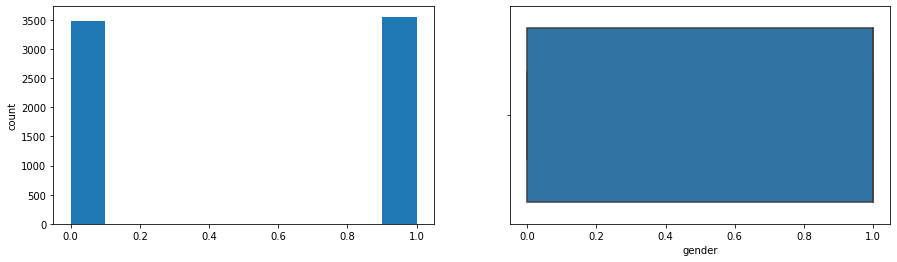

SeniorCitizen
Skew : 1.83


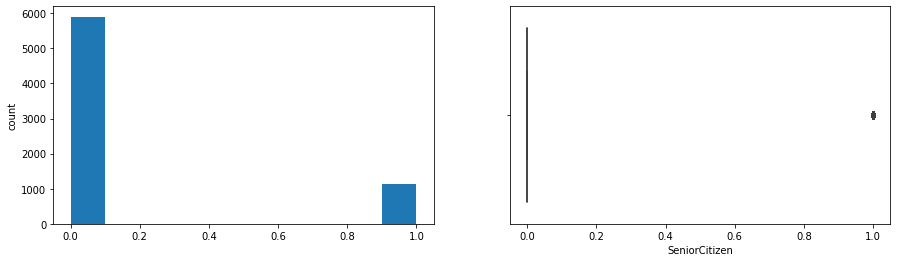

tenure
Skew : 0.24


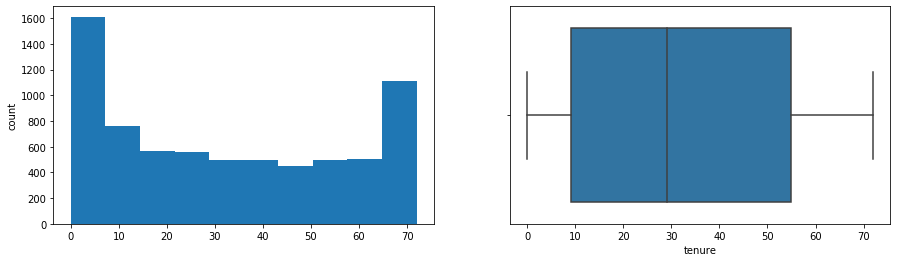

MonthlyCharges
Skew : -0.22


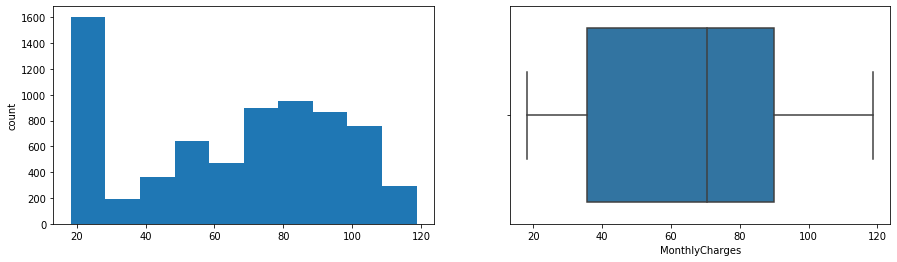

In [10]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

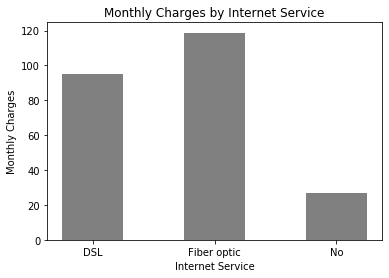

In [11]:
# Create a bar chart using Matplotlib
plt.bar(df['InternetService'], df['MonthlyCharges'], width=0.5, color="grey")
 
# Set the chart title and labels
plt.title('Monthly Charges by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
 
# Display the chart
plt.show()

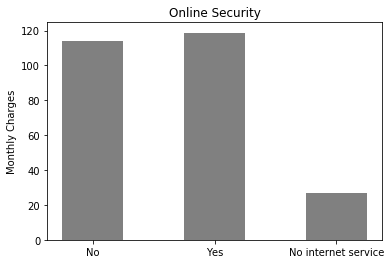

In [12]:
# Create a bar chart using Matplotlib
plt.bar(df['OnlineSecurity'], df['MonthlyCharges'], width=0.5, color="grey")
 
# Set the chart title and labels
plt.title('Online Security')
plt.ylabel('Monthly Charges')
 
# Display the chart
plt.show()

In [13]:
# ----------------- 2. Exploratory Data Analysis (EDA) -----------------
def perform_eda(df):
    """
    Perform exploratory data analysis
    """
    # Numerical variables distribution
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Distribution plots
    plt.figure(figsize=(15, 5*len(numerical_cols)))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 2, 2*i-1)
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} Distribution')
        
        plt.subplot(len(numerical_cols), 2, 2*i)
        sns.boxplot(y=df[col])
        plt.title(f'{col} Box Plot')
    plt.tight_layout()
    
    # Correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    
    # Categorical variables analysis
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
        print("\nPercentage distribution:")
        print(df[col].value_counts(normalize=True) * 100)

In [14]:
#perform_eda(df)

### 3. Feature Engineering

In [15]:
def engineer_features(df):
    """
    Enhanced feature engineering with better data type handling
    """
    df_processed = df.copy()
    
    # Handle TotalCharges conversion first
    if 'TotalCharges' in df_processed.columns:
        # Replace empty strings or spaces with NaN
        df_processed['TotalCharges'] = df_processed['TotalCharges'].replace(' ', np.nan)
        # Convert to float
        df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
    
    # Create additional features
    if 'TotalCharges' in df_processed.columns and 'MonthlyCharges' in df_processed.columns:
        # Avoid division by zero
        df_processed['ChargeRatio'] = df_processed.apply(
            lambda x: x['TotalCharges'] / (x['MonthlyCharges'] * x['tenure']) 
            if x['MonthlyCharges'] * x['tenure'] != 0 else 0, 
            axis=1
        )
    
    if 'tenure' in df_processed.columns:
        df_processed['tenure_squared'] = df_processed['tenure'] ** 2
        df_processed['tenure_bin'] = pd.qcut(df_processed['tenure'], 
                                           q=5, 
                                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    if 'MonthlyCharges' in df_processed.columns:
        df_processed['MonthlyCharges_bin'] = pd.qcut(df_processed['MonthlyCharges'], 
                                                    q=5, 
                                                    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Drop ID columns and unnecessary features
    id_columns = ['customerID', 'CustomerID', 'customerId', 'customer_ID']
    for col in id_columns:
        if col in df_processed.columns:
            df_processed = df_processed.drop(col, axis=1)
    
    # Print info about the processed dataframe
    print("\nProcessed DataFrame Info:")
    print(df_processed.info())
    print("\nMissing Values:")
    print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])
    
    # Identify numeric and categorical columns
    numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Remove target from feature columns
    if 'Churn' in numerical_cols:
        numerical_cols.remove('Churn')
    if 'Churn' in categorical_cols:
        categorical_cols.remove('Churn')
    
    print("\nNumerical columns:", numerical_cols)
    print("\nCategorical columns:", categorical_cols)
    
    # Enhanced preprocessing
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )
    
    return preprocessor, df_processed

### 4. Model Process (Training, Evaluation and Interpretation)

In [16]:
def train_and_evaluate_model(X, y, model, preprocessor, is_classification=True):
    """
    Train model with improvements for handling class imbalance using class weights
    """
    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Calculate class weights
    class_counts = np.bincount(y)
    total_samples = len(y)
    class_weights = {i: total_samples / (len(class_counts) * count) 
                    for i, count in enumerate(class_counts)}
    
    # Create pipeline with class weighting
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=500,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42,
            class_weight=class_weights,
            n_jobs=-1
        ))
    ])
    
    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, 
                              cv=cv, scoring='f1_weighted')
    
    print("\nCross-validation F1 scores:", cv_scores)
    print("Average CV F1 score: {:.3f} (+/- {:.3f})".format(
        cv_scores.mean(), cv_scores.std() * 2))
    
    # Fit pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Detailed evaluation metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Get feature importance
    if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
        try:
            # Get feature names after preprocessing
            all_features = (
                numerical_cols + 
                list(preprocessor.named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names(categorical_cols))
            )
            
            # Get and sort feature importances
            importances = pipeline.named_steps['classifier'].feature_importances_
            feature_importance = pd.DataFrame({
                'feature': all_features,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(feature_importance.head(10))
        except:
            print("\nCouldn't calculate feature importances")
        
        # Print probabilities for a few examples
        y_prob = pipeline.predict_proba(X_test)
        print("\nProbability Distribution for First 5 Predictions:")
        for i in range(5):
            print(f"Sample {i+1}: No Churn: {y_prob[i][0]:.3f}, Churn: {y_prob[i][1]:.3f}")
    
    return pipeline

In [17]:
if __name__ == "__main__":
    # Load data
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    
    # Convert target to numeric
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    
    # Engineer features
    preprocessor, df = engineer_features(df)
    
    # Prepare features and target
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    
    # Train and evaluate model
    model = RandomForestClassifier(random_state=42)
    pipeline = train_and_evaluate_model(X, y, model, preprocessor, is_classification=True)


Processed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              7043 non-null   object  
 1   SeniorCitizen       7043 non-null   int64   
 2   Partner             7043 non-null   object  
 3   Dependents          7043 non-null   object  
 4   tenure              7043 non-null   int64   
 5   PhoneService        7043 non-null   object  
 6   MultipleLines       7043 non-null   object  
 7   InternetService     7043 non-null   object  
 8   OnlineSecurity      7043 non-null   object  
 9   OnlineBackup        7043 non-null   object  
 10  DeviceProtection    7043 non-null   object  
 11  TechSupport         7043 non-null   object  
 12  StreamingTV         7043 non-null   object  
 13  StreamingMovies     7043 non-null   object  
 14  Contract            7043 non-null   object  
 15  PaperlessBi